In [27]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

'''
Note: these were testing function left for archiving
def test():
    x = np.array([5, 15, 25, 35, 45, 55])
    y = np.array([5, 20, 14, 32, 22, 38])
    return x, y

def arrary_test():
    x = np.array([5, 15, 25, 35, 45, 55])
    y = np.array([5, 20, 14, 32, 22, 38])
    data = y
    df = pd.DataFrame(data, index = x)
    x1 = df.index.values
    y1 = df.values
    y2 = list()
    for n in y1:
        for m in n:
            y2.append(m)
    y2 = np.array(y2)
    return x1, y2
'''

#takes a dateframe and returns two arrays, index_setting = 0 means two columns from df. 1 means index + column
#warning, you need a index and a single column for 1, or only two colums(index ok) for 0 or code will not work
def dataframe_to_array(df, index_setting):
    #if data is in a colum and an index
    if index_setting == 1:
        #get the index from the dataframe
        x1 = df.index.values
        #get the values from the dataframe, gives and array of arrays
        y1 = df.values
        y2 = list()
        #transfrom the array of arrays into a single array
        for n in y1:
            for m in n:
                y2.append(m)
        y2 = np.array(y2)
        #return
        return x1, y2
    #if data in is two columns
    else:
        #turn dataframe into and array of arrays
        set_array = df.to_numpy()
        #splits array into two arrays of a single array
        bisector = np.array_split(set_array, 2)
        count = 0
        #define x1 and y1
        for n in bisector:
            if count == 0:
                x1 = n
                count += 1
            else:
                y1 = n
        #reverts back array of array into a just an array
        for n2 in x1:
            x1 = n2
        for n3 in y1:
            y1 = n3
        #return
        return x1, y1

#turns a csv file into a dataframe
#warning, not tested if it works
def csv_into_dataframe(csv_file):
    df = pd.read_csv(csv_file)
    return df

#builds a fuction that returns a predicted y, x1 and y1 are arrays, power refers to highest polynomial degree in model
#Note: this function is outdated now
def predict_dependent(x1, y1, power):
    #build a sorted array for ploting later
    x2 = x1
    np.sort(x2)
    #reshape the x1 and x2 arrays to work for linear regression fitting
    x1 = x1.reshape((-1,1))
    x2 = x2.reshape((-1,1))
    #determine a model type
    if power > 1 and power % 1 == 0:
        #rebulid again to work with polynomial modeling
        x1_ = PolynomialFeatures(degree=power, include_bias=False).fit_transform(x1)
        model = LinearRegression().fit(x1_, y1)
        x2_ = PolynomialFeatures(degree=power, include_bias=False).fit_transform(x2)
        #build predictive array
        prediction = model.predict(x2_)
    #linear is default
    else:
        #bulids a model using two arrays
        model = LinearRegression().fit(x1,y1)
        prediction = model.predict(x2)
    #return, note that both x2 and prediction are in order
    return prediction

#take in a set and return a set with the sorted x and new predicted y, power refers to highest polynomial degree in model
#Note: this function is outdated now
def regression_transform(x1, y1, power):
    #build a model
    x2 = x1
    np.sort(x2)
    x3 = x2
    x1 = x1.reshape((-1,1))
    x2 = x2.reshape((-1,1))
    #x3 is to have a x2_ that is not modified for polynomial features for indexing
    #this next part is slimilar to predict_dependent()
    if power > 1 and power % 1 == 0:
        x1_ = PolynomialFeatures(degree=power, include_bias=False).fit_transform(x1)
        model = LinearRegression().fit(x1_, y1)
        x2_ = PolynomialFeatures(degree=power, include_bias=False).fit_transform(x2)
        y2 = model.predict(x2_)
    else:
        model = LinearRegression().fit(x1,y1)
        y2 = model.predict(x2)
    data = y2
    #bulid a dataframe with y2 as data and x3 as an index
    set_rebuild = pd.DataFrame(data, index = x3)
    #returns the dataset
    return set_rebuild 

#scores how well the model fits that data with a R^2 score, with is from 0 to 1
def prediction_score(x1, y1, power):
    #slimilar structure as above, but no need to organize
    x1 = x1.reshape((-1,1))
    if power > 1 and power % 1 == 0:
        x1_ = PolynomialFeatures(degree=power, include_bias=False).fit_transform(x1)
        model = LinearRegression().fit(x1_, y1)
        #model.score returns a R^2 value, which rates fit from 0 to 1
        score = model.score(x1_, y1)
    else:
        model = LinearRegression().fit(x1,y1)
        score = model.score(x1, y1)
    #return
    return score

#this is the primary function every is built up to, first three are same as above, next three build prediction range
def ranged_regress_transform(x1, y1, power, value_min, value_max, step):
    count = value_min
    x2 = list()
    #create list that starts at min, ends a max, step effects how many calculations are done
    while count <= value_max:
        x2.append(count)
        count += step
    #change the list into an array
    x3 = np.array(x2)
    x3 = x3.reshape((-1,1))
    x1 = x1.reshape((-1,1))
    #also slimilar to above code
    if power > 1 and power % 1 == 0:
        x1_ = PolynomialFeatures(degree=power, include_bias=False).fit_transform(x1)
        model = LinearRegression().fit(x1_, y1)
        x3_ = PolynomialFeatures(degree=power, include_bias=False).fit_transform(x3)
        y2 = model.predict(x3_)
    else:
        model = LinearRegression().fit(x1,y1)
        y2 = model.predict(x3)
    data = y2
    #build the dataframe with good graphing data
    new_build = pd.DataFrame(data, index = x2)
    #return the dataframe
    return new_build

#uses all of the above code, takes a dataframe and returns a dataframe with predicted values
def ranged_df_regress_trans(df, index_setting, power, value_min, value_max, step):
    x1, y1 = dataframe_to_array(df, index_setting)
    final_build = ranged_regress_transform(x1, y1, power, value_min, value_max, step)
    return final_build

#same as above with with scoring
def df_regress_scoring(df, index_setting, power):
    x1, y1 = dataframe_to_array(df, index_setting)
    score = prediction_score(x1, y1, power)
    return score

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55] [ 5.48412698  7.06837698  8.54336508  9.91348016 11.18311111 12.35664683
 13.43847619 14.4329881  15.34457143 16.17761508 16.93650794 17.62563889
 18.24939683 18.81217063 19.31834921 19.77232143 20.17847619 20.54120238
 20.86488889 21.1539246  21.41269841 21.64559921 21.85701587 22.0513373
 22.23295238 22.40625    22.57561905 22.74544841 22.92012698 23.10404365
 23.3015873  23.51714683 23.75511111 24.01986905 24.31580952 24.64732143
 25.01879365 25.43461508 25.8991746  26.41686111 26.99206349 27.62917063
 28.33257143 29.10665476 29.95580952 30.8844246  31.89688889 32.99759127
 34.19092063 35.48126587 36.87301587]


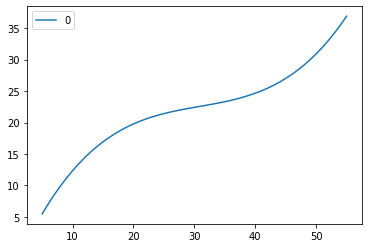

In [28]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])
a = np.array([1,2,3,4,5,6])
b = np.array([3,5,9,14,21,34])
run = ranged_regress_transform(x, y, 3, 5, 55, 1)
run.plot()
running, ran = dataframe_to_array(run, 1)
print(running, ran)

The score is: 0.7665364017947605


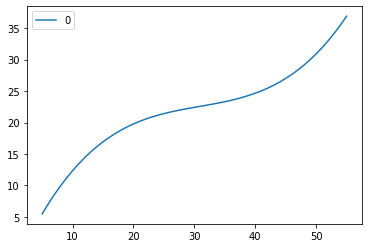

In [29]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])
data = y
df = pd.DataFrame(data, index = x)
final_test = ranged_df_regress_trans(df, 1, 3, 5, 55, 1)
print("The score is:", df_regress_scoring(df, 1, 3))
final_test.plot()